In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch

sns.set()
%matplotlib inline

### Read CSV data files.

In [2]:
import requests

csv_file_path = 'questionnaires/sessions.csv'
df = pd.read_csv(csv_file_path, delimiter=';')
df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


,Session,A-Mean-Healthy,A-STD-Healthy,A-Best-Healthy,B-Mean-Healthy,B-STD-Healthy,B-Best-Healthy,C-Mean-Healthy,C-STD-Healthy,C-Best-Healthy,B-Mean-PD,B-STD-PD,B-Best-PD
0,IPQ-GP,"4,8","0,88640526",6.0,"4,9","0,991031209",6,"5,3","0,46291005",6,5,#DIV/0!,5
1,IPQ-SP,"4,5","0,897043756",6.0,"4,4","1,073108802",6,5.0,"0,240442301",6,"4,2","1,923538406",6
2,IPQ-INV,4,"0,306186218",5.0,"3,9","0,144337567",5,"4,3","0,102062073",6,"5,3","1,5",6
3,IPQ-REAL,"3,1","1,218349293",5.0,"3,1","1,053268722",4,"3,0","1,204916145",5,"4,3","2,217355783",6
4,IMI-ENJ,"5,3","1,00519484",7.0,"5,6","0,955871579",7,"5,8","0,871592003",7,"6,1","1,069044968",7


### Data Cleaning and Preparation for Healthy and PD Features.

In [3]:
df.replace(',', '.', regex=True, inplace=True)
df.replace('#DIV/0!', '0', regex=True, inplace=True)
df.replace('', '0', regex=True, inplace=True)

data = df[['A-Mean-Healthy','A-STD-Healthy','A-Best-Healthy', 'B-Mean-Healthy','B-STD-Healthy','B-Best-Healthy', 'C-Mean-Healthy','C-STD-Healthy','C-Best-Healthy', 'B-Mean-PD','B-STD-PD','B-Best-PD']]

data

,A-Mean-Healthy,A-STD-Healthy,A-Best-Healthy,B-Mean-Healthy,B-STD-Healthy,B-Best-Healthy,C-Mean-Healthy,C-STD-Healthy,C-Best-Healthy,B-Mean-PD,B-STD-PD,B-Best-PD
0,4.8,0.88640526,6.0,4.9,0.991031209,6,5.3,0.46291005,6,5,0,5
1,4.5,0.897043756,6.0,4.4,1.073108802,6,5.0,0.240442301,6,4.2,1.923538406,6
2,4,0.306186218,5.0,3.9,0.144337567,5,4.3,0.102062073,6,5.3,1.5,6
3,3.1,1.218349293,5.0,3.1,1.053268722,4,3.0,1.204916145,5,4.3,2.217355783,6
4,5.3,1.00519484,7.0,5.6,0.955871579,7,5.8,0.871592003,7,6.1,1.069044968,7
5,5.7,0.189571886,7.0,6.0,0.360121507,7,6.0,0.31124749,7,6.4,0.547722558,7
6,6.2,0.29843341,7.0,6.4,0.227073777,7,6.4,0.189571886,7,7,0,7
7,1.2,0.223606798,4.0,1.5,0.427565784,4,2.0,0.736333824,5,4,2.828427125,7
8,5.4,1.14304314,7.0,5.7,0.704999156,7,5.8,0.942151161,7,5.3,0.487950036,6
9,NaN,NaN,NaN,3.8,1.38873015,5,4.1,1.125991626,5,4,0,4


### Fonts and Colors for Graphical Representation.

In [4]:
font_color = '#525252'
bar_color = '#000000'
tfont = {'fontname':'Arial Black'}
hfont = {'fontname':'Arial'}

match_blues = ['#01b8aa', '#7beea8', '#7b89ee']
match_purples = ['#af5669', '#facca4', '#331743']
match_nude = ['#4bb3b7', '#dbcda7', '#40474d']
match_red = ['#ff7a60', '#ffa860', '#ffe760', '#7b89ee']
match_warm = ['#386858', '#dbcda7', '#cd541d', '#922636']
match_country = ['#197378', '#dbcda7', '#c6344a']
match_pink = ['#facca4', '#f27352', '#c84b6d']
match_pinkish = ['#c75a77', '#ea976d', '#766084']

index = data.index

### Configuring Parameters to Each Questionnaire: IPQ, IMI, and KVIQ.

In [5]:
def define_parameters(questionnaire):
    if questionnaire == 'IPQ':
        items = ['General \nPresence','Spatial \nPresence','Involvement','Experienced \nRealism']
        title = "Igroup Presence Questionnaire (IPQ)"
        ticks = [0,1,2,3,4,5,6]
        skip = 0
        start, end = 0, 4
        palette = match_nude
    elif questionnaire == 'IMI':
        items = ['Interest/Enjoyment','Perceived \nCompetence','Effort/Importance','Pressure/Tension','Value/Usefulness']
        title = "Intrinsic Motivation Inventory (IMI)"
        ticks = [1,2,3,4,5,6,7]
        skip = 4
        start, end = 4, 9
        palette = match_country
    else:
        items = ['Activity 1','Activity 2','Activity 3.1','Activity 3.2']
        title = "The Kinesthetic and Visual Imagery Questionnaire (KVIQ)"
        ticks = [1,2,3,4,5]
        skip = 9
        start, end = 9, 17
        palette = match_warm
    
    return items, title, ticks, skip, start, end, palette

### Collecting and Storing Results for Healthy and PD Data Classes.

In [6]:
def store_results(start, end):
    
    classA_Healthy = data['A-Mean-Healthy'][start:end].astype(float)
    classB_Healthy = data['B-Mean-Healthy'][start:end].astype(float)
    classC_Healthy = data['C-Mean-Healthy'][start:end].astype(float)
    classB_PD = data['B-Mean-PD'][start:end].astype(float)

    classA_Healthy_err = data['A-STD-Healthy'][start:end].astype(float)
    classB_Healthy_err = data['B-STD-Healthy'][start:end].astype(float)
    classC_Healthy_err = data['C-STD-Healthy'][start:end].astype(float)
    classB_PD_err = data['B-STD-PD'][start:end].astype(float)

    return classA_Healthy, classB_Healthy, classC_Healthy, classB_PD, classA_Healthy_err, classB_Healthy_err, classC_Healthy_err, classB_PD_err

def store_results_kviq():

    classB_Healthy_Visual = data['B-Mean-Healthy'][[9, 11, 13, 15]].astype(float)
    classB_Healthy_Kinesthetic = data['B-Mean-Healthy'][[10, 12, 14, 16]].astype(float)
    classC_Healthy_Visual = data['C-Mean-Healthy'][[9, 11, 13, 15]].astype(float)
    classC_Healthy_Kinesthetic = data['C-Mean-Healthy'][[10, 12, 14, 16]].astype(float)
    classB_PD_Visual = data['B-Mean-PD'][[9, 11, 13, 15]].astype(float)
    classB_PD_Kinesthetic = data['B-Mean-PD'][[10, 12, 14, 16]].astype(float)

    classB_Healthy_err_Visual = data['B-STD-Healthy'][[9, 11, 13, 15]].astype(float)
    classB_Healthy_err_Kinesthetic = data['B-STD-Healthy'][[10, 12, 14, 16]].astype(float)
    classC_Healthy_err_Visual = data['C-STD-Healthy'][[9, 11, 13, 15]].astype(float)
    classC_Healthy_err_Kinesthetic = data['C-STD-Healthy'][[10, 12, 14, 16]].astype(float)
    classB_PD_err_Visual = data['B-STD-PD'][[9, 11, 13, 15]].astype(float)
    classB_PD_err_Kinesthetic = data['B-STD-PD'][[10, 12, 14, 16]].astype(float)

    return classB_Healthy_Visual, classB_Healthy_Kinesthetic, classC_Healthy_Visual, classC_Healthy_Kinesthetic, classB_Healthy_err_Visual, classB_Healthy_err_Kinesthetic, classC_Healthy_err_Visual, classC_Healthy_err_Kinesthetic, classB_PD_Visual, classB_PD_Kinesthetic, classB_PD_err_Visual, classB_PD_err_Kinesthetic

### Plotting IPQ and IMI Results: Healthy vs. Parkinson's Disease.

In [7]:
def plot_results(questionnaire, add_size, prod, add, hor, vert):
    items, title, ticks, skip, start, end, palette = define_parameters(questionnaire)
    classA_Healthy, classB_Healthy, classC_Healthy, classB_PD, classA_Healthy_err, classB_Healthy_err, classC_Healthy_err, classB_PD_err = store_results(start, end)

    y = np.arange(len(items))
    bar_width = 0.3 

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(hor, vert))
    fig.tight_layout()

    fig.suptitle(title, fontsize=22+add_size, color='#000000', **tfont, y=0.98)

    ###################### Healthy Population ######################

    axes[0].barh(y - bar_width, classA_Healthy, bar_width, xerr=classA_Healthy_err, color=palette[0], label='Session A', align='center', capsize=5, ecolor='#5e5e5e')
    axes[0].barh(y, classB_Healthy, bar_width, xerr=classB_Healthy_err, color=palette[1], label='Session B', align='center', capsize=5, ecolor='#5e5e5e')
    axes[0].barh(y + bar_width, classC_Healthy, bar_width, xerr=classC_Healthy_err, color=palette[2], label='Session C', align='center', capsize=5, ecolor='#5e5e5e')

    axes[0].set_title("Healthy Population", fontsize=19+add_size, pad=15, color='#000000', **hfont, fontweight='heavy')
    axes[0].set_yticks(y)
    axes[0].set_yticklabels(items, fontsize=17+add_size)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y', colors='#000000')
    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(ticks, fontsize=17 + add_size)
    axes[0].set_xlim(min(ticks), max(ticks)+0.5)
    legend = axes[0].legend(loc='center', bbox_to_anchor=(1.0, -0.08), borderaxespad=0., fontsize=15+add_size, ncol=3)
    legend.get_frame().set_facecolor('white')  # You can set this to 'none' for transparency
    legend.get_frame().set_alpha(0.5)   

    axes[0].grid(True, which='both', color='#cfcfcf', linestyle='-', linewidth=0.8)

    for spine in ['top', 'bottom', 'left', 'right']:
        axes[0].spines[spine].set_visible(True)  # Ensure spines are visible
        axes[0].spines[spine].set_color('#cfcfcf')  # Set color to black
        axes[0].spines[spine].set_linewidth(1.0)  # Set the linewidth for the rectangle

    for i in range(len(items)):
        i += skip
        if questionnaire == "IMI":
            axes[0].text(classA_Healthy[i] + 0.35 + add, i - bar_width - 0.08 - prod, f'{classA_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
            axes[0].text(classB_Healthy[i] + 0.35 + add, i - 0.08 - prod, f'{classB_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
            axes[0].text(classC_Healthy[i] + 0.35 + add, i + bar_width - 0.08 - prod, f'{classC_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
        else:
            axes[0].text(classA_Healthy[i] + 0.42 + add, i - bar_width - 0.08 - prod, f'{classA_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
            axes[0].text(classB_Healthy[i] + 0.42 + add, i - 0.08 - prod, f'{classB_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
            axes[0].text(classC_Healthy[i] + 0.42 + add, i + bar_width - 0.08 - prod, f'{classC_Healthy[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)

    ###################### Parkinson's Patients ######################

    axes[1].barh(y, classB_PD, bar_width, xerr=classB_PD_err, color=palette[1], align='center', capsize=5, ecolor='#5e5e5e')
    axes[1].set_title("Parkinson's Patients", fontsize=19+add_size, pad=15, color='#000000', **hfont, fontweight='heavy')

    for i in range(len(items)):
        i += skip
        if i == 6 and questionnaire == "IMI":
            axes[1].text(classB_PD[i] - 0.7 + add, i + 0.02 - prod, f'{classB_PD[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)
        else:
            axes[1].text(classB_PD[i] + 0.06 + add, i - 0.08 - prod, f'{classB_PD[i]:.1f}', va='center', ha='left', color='#000000', fontsize=13+add_size)

    axes[0].invert_xaxis()
    plt.gca().invert_yaxis()

    axes[1].set_xticks(ticks)
    axes[1].set_xticklabels(ticks, fontsize=17 + add_size)
    axes[1].set_xlim(min(ticks), max(ticks)+0.5)
    axes[1].grid(True, which='both', color='#cfcfcf', linestyle='-', linewidth=0.8)

    for spine in ['top', 'bottom', 'left', 'right']:
        axes[1].spines[spine].set_visible(True)
        axes[1].spines[spine].set_color('#cfcfcf')
        axes[1].spines[spine].set_linewidth(1.0)

    if questionnaire == "IMI":
        plt.subplots_adjust(wspace=0, top=0.89+(add/10), bottom=0.095, left=0.13+((add/100)+0.02), right=0.98)
    else:
        plt.subplots_adjust(wspace=0, top=0.89+(add/10), bottom=0.1, left=0.09+((add/100)+0.02), right=0.98)

    plt.savefig(f'images/{questionnaire}-chart.pdf', dpi=600, transparent=True)  # Transparent background
    plt.show()

### Plotting KVIQ Results: Healthy vs. Parkinson's Disease.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results_vert(questionnaire, add_size, prod, add):
    items, title, ticks, skip, start, end, palette = define_parameters(questionnaire)

    classB_Healthy_Visual, classB_Healthy_Kinesthetic, classC_Healthy_Visual, classC_Healthy_Kinesthetic, classB_Healthy_err_Visual, classB_Healthy_err_Kinesthetic, classC_Healthy_err_Visual, classC_Healthy_err_Kinesthetic, classB_PD_Visual, classB_PD_Kinesthetic, classB_PD_err_Visual, classB_PD_err_Kinesthetic = store_results_kviq()

    x = np.arange(len(items))
    bar_width = 0.23

    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(17, 11))
    fig.tight_layout()
    fig.suptitle(title, fontsize=22+add_size, color='#000000', **tfont, y=0.98)

    axes[0].bar(x - bar_width, classB_Healthy_Visual, bar_width, yerr=classB_Healthy_err_Visual, color=palette[0], label='Session B - Visual', align='center', capsize=5, ecolor='#5e5e5e')
    axes[0].bar(x, classB_Healthy_Kinesthetic, bar_width, yerr=classB_Healthy_err_Kinesthetic, color=palette[1], label='Session B - Kinesthetic', align='center', capsize=5, ecolor='#5e5e5e')
    axes[0].bar(x + bar_width, classC_Healthy_Visual, bar_width, yerr=classC_Healthy_err_Visual, color=palette[2], label='Session C - Visual', align='center', capsize=5, ecolor='#5e5e5e')
    axes[0].bar(x + (bar_width * 2), classC_Healthy_Kinesthetic, bar_width, yerr=classC_Healthy_err_Kinesthetic, color=palette[3], label='Session C - Kinesthetic', align='center', capsize=5, ecolor='#5e5e5e')

    axes[0].set_xticks(x)
    axes[0].set_xticklabels(items, fontsize=17+add_size, ha='center')
    axes[0].xaxis.tick_bottom()
    axes[0].tick_params(axis='x', colors='#000000')
    axes[0].set_yticks(ticks)
    axes[0].set_yticklabels(ticks, fontsize=17+add_size)
    legend = axes[0].legend(loc='center', bbox_to_anchor=(0.5, -1.15), borderaxespad=0., fontsize=16+add_size, ncol=4)
    legend.get_frame().set_facecolor('white') 
    legend.get_frame().set_alpha(0.5)

    axes[0].grid(True, which='both', color='#cfcfcf', linestyle='-', linewidth=0.8)
    for spine in ['top', 'bottom', 'left', 'right']:
        axes[0].spines[spine].set_visible(True)
        axes[0].spines[spine].set_color('#cfcfcf')
        axes[0].spines[spine].set_linewidth(1.0)

    minus = 0
    for i in range(len(items) * 2):
        i += skip
        if i % 2 == 0:
            continue
        else:
            axes[0].text(i - minus - 9.135, classB_Healthy_Visual[i] + 0.07 + add, f'{classB_Healthy_Visual[i]:.1f}', va='bottom', ha='right', color='#000000', fontsize=13 + add_size)
            axes[0].text(i - minus - 9.135 + bar_width, classB_Healthy_Kinesthetic[i+1] + 0.07 + add, f'{classB_Healthy_Kinesthetic[i+1]:.1f}', va='bottom', ha='right', color='#000000', fontsize=13 + add_size)
            axes[0].text(i - minus - 9.135 + bar_width * 2, classC_Healthy_Visual[i] + 0.07 + add, f'{classC_Healthy_Visual[i]:.1f}', va='bottom', ha='right', color='#000000', fontsize=13 + add_size)
            axes[0].text(i - minus - 9.135 + bar_width * 3, classC_Healthy_Kinesthetic[i+1] + 0.07 + add, f'{classC_Healthy_Kinesthetic[i+1]:.1f}', va='bottom', ha='right', color='#000000', fontsize=13 + add_size)
            minus += 1

    axes[1].bar(x, classB_PD_Visual, bar_width, yerr=classB_PD_err_Visual, color=palette[1], label='Session B - Visual', align='center', capsize=5, ecolor='#5e5e5e')
    axes[1].bar(x + bar_width, classB_PD_Kinesthetic, bar_width, yerr=classB_PD_err_Kinesthetic, color=palette[2], label='Session B - Kinesthetic', align='center', capsize=5, ecolor='#5e5e5e')

    minus = 0
    j = 0
    for i in range(len(items) * 2):
        i += skip
        if i % 2 == 0:
            continue
        if j / 2 > 0:
            continue
        else:
            axes[1].text(i - minus - 8.98, classB_PD_Visual[i] + 0.2 + add, f'{classB_PD_Visual[i]:.2f}', va='bottom', ha='left', color='#000000', fontsize=13 + add_size)
            axes[1].text(i - minus - 8.98 + bar_width, classB_PD_Kinesthetic[i+1] + 0.2 + add, f'{classB_PD_Kinesthetic[i+1]:.2f}', va='bottom', ha='left', color='#000000', fontsize=13 + add_size)
            minus += 1
        j += 1

    axes[1].set_xticks(x)
    axes[1].set_xticklabels(items, fontsize=17 + add_size, ha='center')
    axes[1].xaxis.tick_bottom()
    axes[1].tick_params(axis='x', colors='#000000')
    axes[1].invert_yaxis()
    axes[1].set_yticks(ticks)
    axes[1].set_yticklabels(ticks, fontsize=17 + add_size)

    axes[1].grid(True, which='both', color='#cfcfcf', linestyle='-', linewidth=0.8)
    for spine in ['top', 'bottom', 'left', 'right']:
        axes[1].spines[spine].set_visible(True)
        axes[1].spines[spine].set_color('#cfcfcf')
        axes[1].spines[spine].set_linewidth(1.0)

    min_limit = min(ticks)
    max_limit = max(ticks)
    axes[0].set_ylim(min_limit, max_limit)
    axes[1].set_ylim(max_limit, min_limit)

    axes[0].text(-0.04, 0.5, "Healthy Population", ha='center', va='center', transform=axes[0].transAxes, fontsize=19 + add_size, color='#000000', **hfont, fontweight='heavy', rotation=90)
    axes[1].text(-0.04, 0.5, "Parkinson's Patients", ha='center', va='center', transform=axes[1].transAxes, fontsize=19 + add_size, color='#000000', **hfont, fontweight='heavy', rotation=90)

    plt.subplots_adjust(hspace=0, top=0.93, bottom=0.095, left=0.06, right=0.99)

    filename = f'images/{questionnaire}-chart'
    plt.savefig(filename + '.pdf', dpi=600, transparent=True)

    plt.show()


### Plot Results for Each Questionnaire: (1) IPQ; (2) IMI; (3) KVIQ.

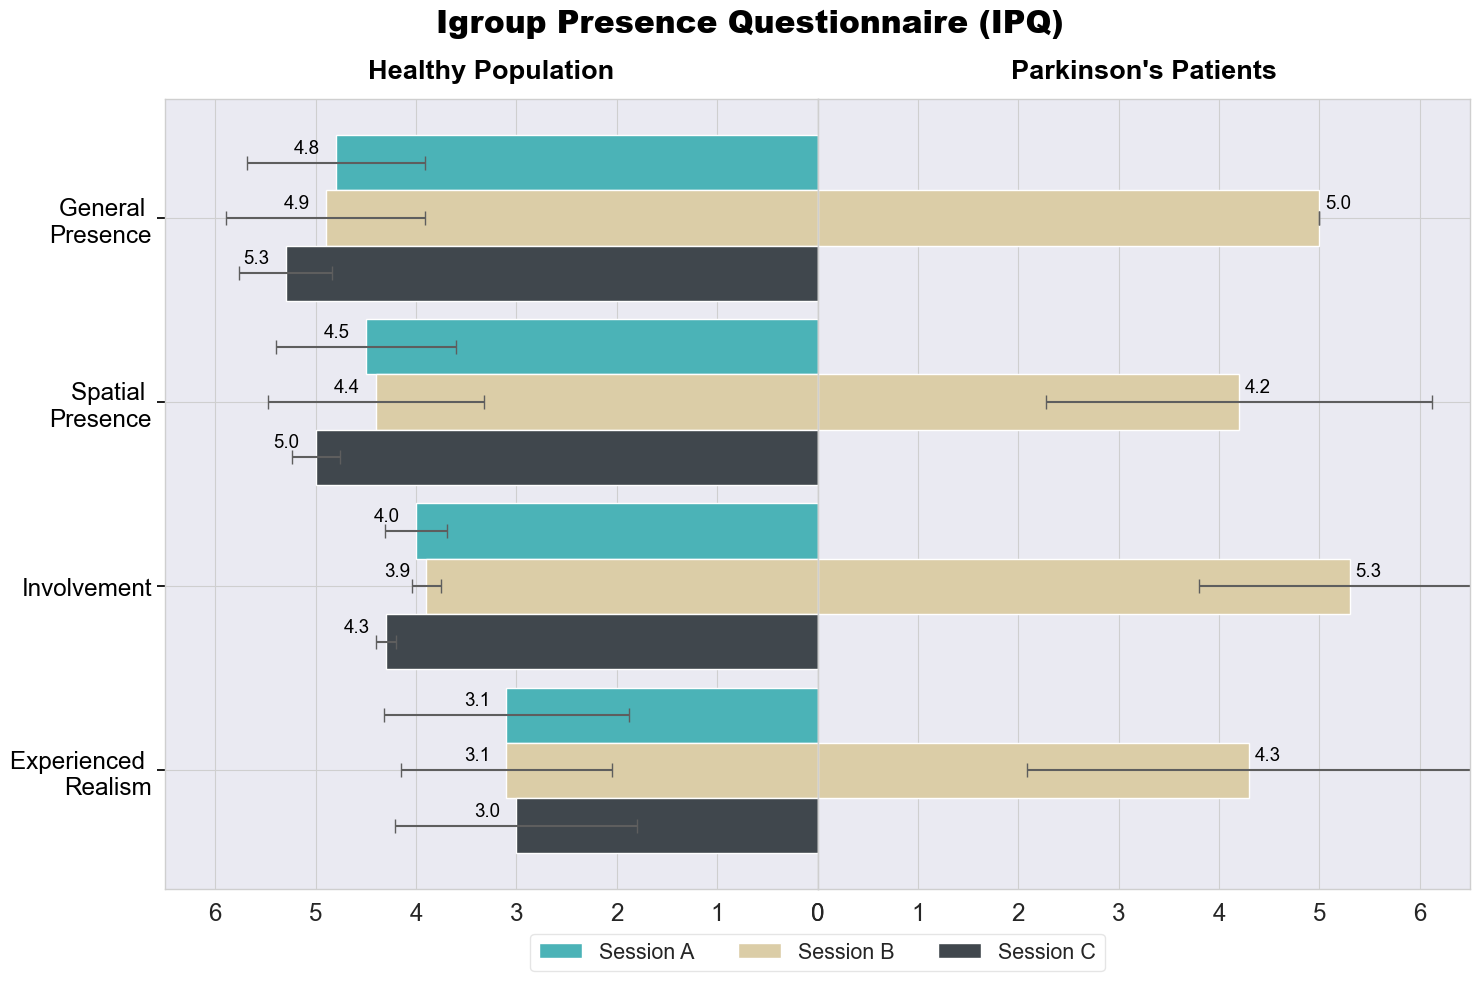

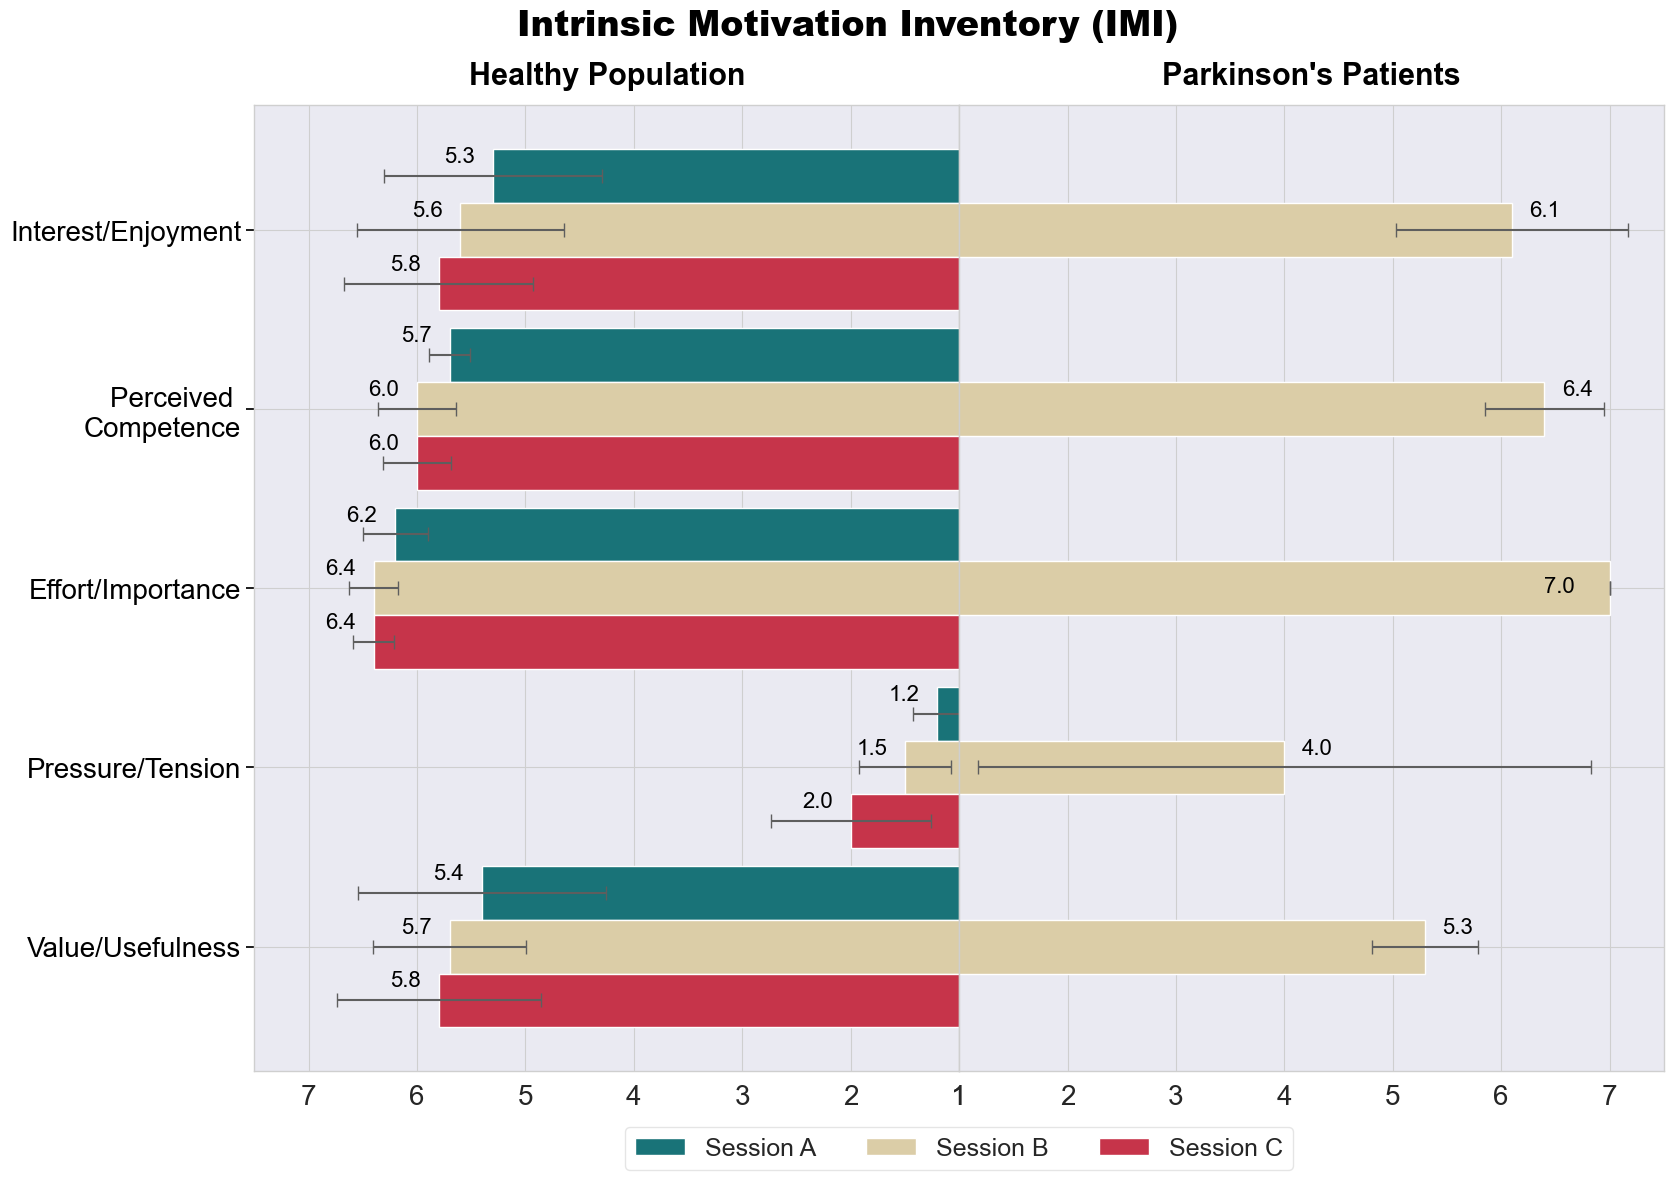

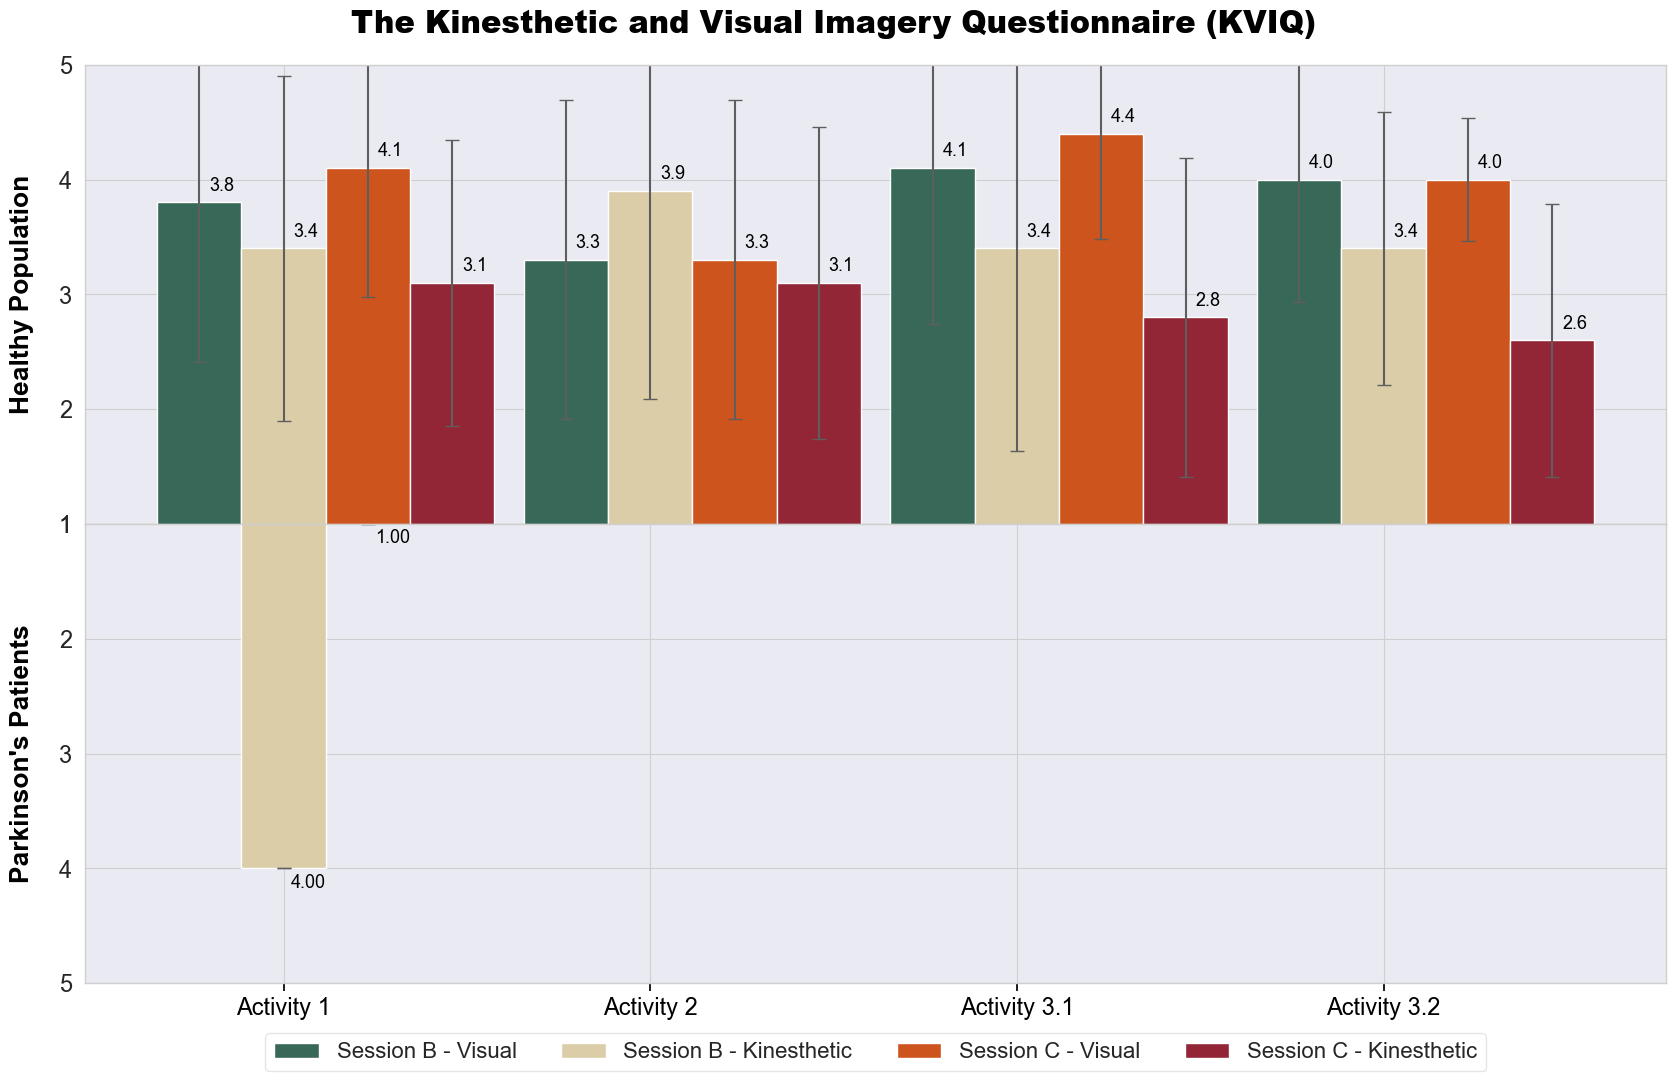

In [9]:
plot_results("IPQ", 0.5, 0, 0, 15, 10)
plot_results("IMI", 3, 4.03, 0.1, 17, 12)
plot_results_vert("KVIQ", 0, 1, 0)